# Identify Fraud From Enron Email Dataset

In 2000, Enron was one of the largest companies in the United States in energy trading and was named as 'America's most innovative company'. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, i have applied my machine learning skills by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

There are seven major steps in my project:
1. Load the Dataset and Query the dataset.
2. Outlier Detection and Removal
3. Feature Pre-processing
4. Classifier
5. Comparison of different classifier
6. Parameter Tuning
7. Validation of Classifier

## Load The Dataset


In [184]:
""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    and here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))
print "There are "+str(len(enron_data))+" executives in Enron Dataset"

There are 146 executives in Enron Dataset


In [183]:
count=0
for i in enron_data:
    if(enron_data[i]["poi"]==1):
        count=count+1
print "There are "+str(count)+" Person of Interest(POI) and "+str((len(enron_data))-(count))+" Non-POIs  in our Dataset "

There are 18 Person of Interest(POI) and 128 Non-POIs  in our Dataset 


In [12]:
print "There are "+str(len(enron_data["SKILLING JEFFREY K"]))+" features available for each person"

There are 21 features available for each person


In [17]:
print "The 21 features are listed below:"
k=1
for i in enron_data["SKILLING JEFFREY K"]:
    print "Feature "+str(k)+": "+i
    k = k+1

The 21 features are listed below:
Feature 1:salary
Feature 2:to_messages
Feature 3:deferral_payments
Feature 4:total_payments
Feature 5:exercised_stock_options
Feature 6:bonus
Feature 7:restricted_stock
Feature 8:shared_receipt_with_poi
Feature 9:restricted_stock_deferred
Feature 10:total_stock_value
Feature 11:expenses
Feature 12:loan_advances
Feature 13:from_messages
Feature 14:other
Feature 15:from_this_person_to_poi
Feature 16:poi
Feature 17:director_fees
Feature 18:deferred_income
Feature 19:long_term_incentive
Feature 20:email_address
Feature 21:from_poi_to_this_person


# Outlier Detection and Removal

Just going through the Enron Dataset,I found Outlier when Bonus of people were plotted against the salary of person.


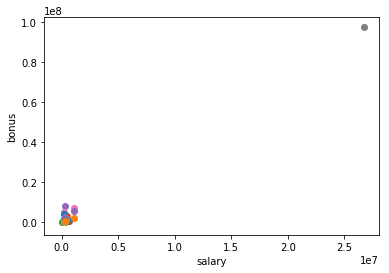

In [70]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data = featureFormat(data_dict, features,remove_any_zeroes=True)
features = ["salary", "bonus"]
for point in data:
    salary = point[0]
    bonus = point[1]
    
    matplotlib.pyplot.scatter(salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [68]:
#finding the point of outlier
for key, value in data_dict.items():
    if value['bonus'] == data.max():
        print key

TOTAL


As it can be seen "TOTAL" is irrelavant point.Therefor is removed and grapg is replotted below.

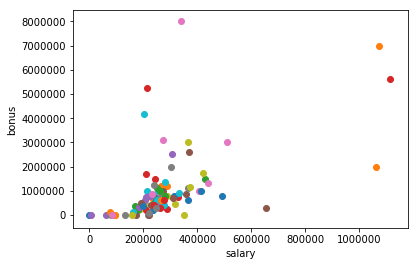

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]

In [85]:
data_dict.pop('TOTAL',0)
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()



In [86]:
##other ouliers
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue 
    
    outliers.append((key,int(val)))
    
outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:2])
outliers_final

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]

These points cannot be removed from dataset as they are important people in Enron case and represent as the person of Interest(POI).

### Linear Regression to predict Bonus from salary
Now,To predict the bonus of an Employee when only salary of a person is only given.Linear Regression is used.
In regression, you need training and testing data, just like in classification.
We will see how outlier affect the Regression.
Outlier Detection and Removal is a process which comprise of:

1. Train the dataset.
2. Identify the outlier and remove the points with Residual Error.
3. Re-Train the dataset.

[ 0.27229528]
-0.877354252073


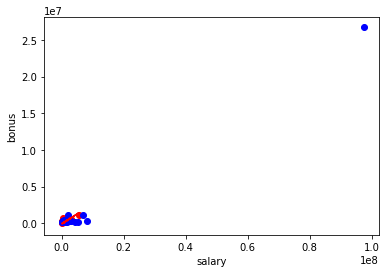

In [95]:
## Training the data
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data = featureFormat(data_dict, features,remove_any_zeroes=True)
features = ["salary", "bonus"]
target, feature = targetFeatureSplit( data )

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression as lr
reg=lr()
reg.fit(feature_train,target_train)
try:
    matplotlib.pyplot.plot( feature_test, reg.predict(feature_test),color='r' )
except NameError:
    pass

print reg.coef_
print reg.score(feature_test , target_test)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    matplotlib.pyplot.scatter( feature, target, color="r" ) 
for feature, target in zip(feature_train, target_train):
    matplotlib.pyplot.scatter( feature, target, color="b" ) 


[ 0.03954061]
0.203020850473


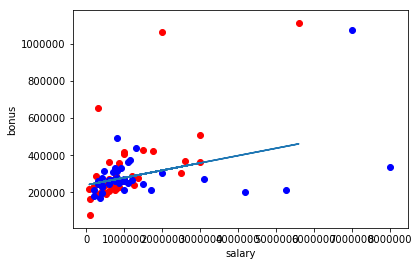

In [97]:
### Identification of outlier
#!/usr/bin/python


data_dict.pop('TOTAL',0)
# data_dict.pop('LAVORATO JOHN J',0)
data = featureFormat(data_dict, features,remove_any_zeroes=True)
target, feature = targetFeatureSplit( data )

from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.5, random_state=42)
from sklearn.linear_model import LinearRegression as lr
reg=lr()
reg.fit(feature_train,target_train)
try:
    matplotlib.pyplot.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

print reg.coef_
print reg.score(feature_test , target_test)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    matplotlib.pyplot.scatter( feature, target, color="r" ) 
for feature, target in zip(feature_train, target_train):
    matplotlib.pyplot.scatter( feature, target, color="b" ) 



It can be observed how outlier affects the result of Regression.There is drastic difference between regression score with  outlier and without outlier.Therefore outliers must be removed from dataset before any conclusions.

## Feature Processing


### New Features

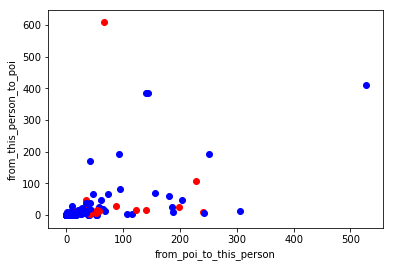

In [162]:
# from sklearn.feature_selection import SelectKBest, f_classif

# selector = SelectKBest(f_classif, k=10)
# selector.fit(features_train, labels_train)
# features_train_transformed = selector.transform(features_train).toarray()
# features_test_transformed  = selector.transform(features_test).toarray()

##New Features
def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1


### store to my_dataset for easy export below
my_dataset = data_dict
for item in data_dict:
    Fraction_to=data_dict[item]['from_this_person_to_poi']
    Fraction_From=data_dict[item]['from_poi_to_this_person']
    if(data_dict[item]['poi']==1):
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='r' )
    else:
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='b' )
matplotlib.pyplot.xlabel("from_poi_to_this_person")
matplotlib.pyplot.ylabel("from_this_person_to_poi")
matplotlib.pyplot.show()


When I picked 'from_poi_to_this_person' and 'from_this_person_to_poi' but there is was no strong pattern
when I plotted the data so I used fractions for both features of “from/to poi messages” and “total
from/to messages”.

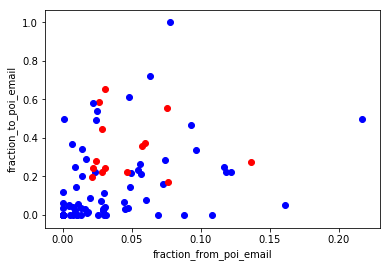

In [117]:
for item in data_dict:
    Fraction_to=data_dict[item]['fraction_to_poi_email']
    Fraction_From=data_dict[item]['fraction_from_poi_email']
    if(data_dict[item]['poi']==1):
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='r' )
    else:
       matplotlib.pyplot.scatter( Fraction_From, Fraction_to,color='b' )
matplotlib.pyplot.xlabel("fraction_from_poi_email")
matplotlib.pyplot.ylabel("fraction_to_poi_email")
matplotlib.pyplot.show()

Two new features were created and tested for this project. These were:
● the fraction of all emails to a person that were sent from a person of interest;
● the fraction of all emails that a person sent that were addressed to persons of interest.
My assumption was that there is stronger connection between POI’s via email then that between POI’s
and non-POI’s. When we look at scatterplot we can agree that the data pattern confirms said
above, e.i. there is no POI below 0.2 in “x” axis.


### Feature Selection

In [173]:
features_list=["salary", "bonus", "fraction_from_poi_email", "fraction_to_poi_email",
'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
'deferred_income', 'total_stock_value']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy when using Naive Bayes Classifier:"+str(accuracy)

print "NB algorithm time:", round(time()-t0, 3), "s"


Accuracy when using Naive Bayes Classifier:0.318181818182
NB algorithm time: 0.014 s


Manually picked Features that maximize the accuracy of the Classifier.

In [175]:
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from time import time
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "Accuracy when using Naive Bayes Classifier:"+str(accuracy)
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))
print "NB algorithm time:", round(time()-t0, 3), "s"

Accuracy when using Naive Bayes Classifier:0.807692307692
Precision: 0.0
Recall: 0.0
NB algorithm time: 0.005 s


## Classification Algorithm for Enron Dataset
When there is no splitting of data as Training and Testing set.

In [176]:
##Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(features,labels)
pred=clf.predict(features)


from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,labels)
print acc

1.0


There are two problems when there is no splitting of Training and Testing data:
* Performance of the algorithm cannit be compared.
* Overfitting of Data.
Therefore splitting the dataset into Training and testing dataset as shown below:

In [177]:
t0 = time()

clf=DecisionTreeClassifier()
clf.fit(features_train,labels_train)
pred=clf.predict(features_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score
acc=accuracy_score(pred,labels_test)

print "Accuracy when using Decision Tree Classifier: " + str(acc)
print "DT algorithm time:", round(time()-t0, 3), "s"
print "Precision: " +str(precision_score(pred,labels_test))
print "Recall: "+str(recall_score(pred,labels_test))

Accuracy when using Decision Tree Classifier: 0.923076923077
DT algorithm time: 0.002 s
Precision: 0.5
Recall: 1.0


## Parameter Tuning 
 In this dataset I cannot use accuracy for evaluating my algorithm because there a few POI’s in
dataset and the best evaluator are precision and recall. There were only 18 examples of POIs in
the dataset. There were 35 people who were POIs in “real life”, but for various reasons, half of
those are not present in this dataset.

By manually setting the min_samples_split parameter in Decision Tree, Precision and Recall can be compared.

In [182]:
def dt_min_samples_split(k):
    t0 = time()

    clf=DecisionTreeClassifier(min_samples_split=k)
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)

    from sklearn.metrics import accuracy_score,precision_score,recall_score
    acc=accuracy_score(pred,labels_test)

    print "Accuracy when using Decision Tree Classifier: " + str(acc)
    print "DT algorithm time:", round(time()-t0, 3), "s"
    print "Precision: " +str(precision_score(pred,labels_test))
    print "Recall: "+str(recall_score(pred,labels_test))
    
dt_min_samples_split(2)
dt_min_samples_split(3)
dt_min_samples_split(5)
dt_min_samples_split(10)
dt_min_samples_split(15)
dt_min_samples_split(20)

Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.923076923077
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 1.0
Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.884615384615
DT algorithm time: 0.001 s
Precision: 0.5
Recall: 0.666666666667
Accuracy when using Decision Tree Classifier: 0.846153846154
DT algorithm time: 0.001 s
Precision: 0.75
Recall: 0.5
Accuracy when using Decision Tree Classifier: 0.769230769231
DT algorithm time: 0.001 s
Precision: 0.75
Recall: 0.375


## Validation Of Classifier
First I used accuracy to evaluate my algorithm. It was a mistake because in this case we have a
class imbalance problem : the number of POIs is small compared to the total number of
examples in the dataset. So I had to use precision and recall for these activities instead.
I was able to reach average value of precision = 0.6, recall = 0.771.


# Conclusion
Firstly I tried Naive Bayes accuracy was lower than with Decision Tree Algorithm (0.80 and 0.92
respectively). I made a conclusion that that the feature set I used does not suit the distributional
and interactive assumptions of Naive Bayes well.
I selected Decision Tree Algorithm for the POI identifier. It gave me accuracy before tuning
parameters = 0.88. No feature scaling was used, as it’s not necessary when using a decision
tree.
After selecting features and algorithm I manually tuned parameter min_samples_split.
After using min_samples_split as 3 the Decision Tree gave maximum accuracy.
